# this is test code for AhoCorasickBuilder in dfa.py

In [ ]:
import ctrlg
import networkx as nx
import matplotlib.pyplot as plt

In [16]:

# 假设我们有一个简化的词汇表，只有 5 个 token
vocab_size = 5

# 创建 AhoCorasickBuilder 实例
ac_builder = ctrlg.AhoCorasickBuilder(vocab_size)
# 定义要匹配的模式
# 假设 [1, 2] 表示 "ab"，[2, 3] 表示 "bc"，[1, 2, 4] 表示 "abd"
patterns = [[1, 2], [2, 3], [1, 2, 4]]

# 构建 Aho-Corasick 自动机
dfa = ac_builder.build(patterns)

# 输出结果
print("Initial state:", dfa['initial_state'])
print("Accept states:", dfa['accept_states'])
print("Edges:")
for edge in dfa['edges']:
    print(edge)

Initial state: ()
Accept states: {(2, 3), (1, 2)}
Edges:
((), (2,), array([False, False,  True, False, False]))
((), (1,), array([False,  True, False, False, False]))
((), (), array([ True, False, False,  True,  True]))
((2,), (2, 3), array([False, False, False,  True, False]))
((2,), (1,), array([False,  True, False, False, False]))
((2,), (2,), array([False, False,  True, False, False]))
((2,), (), array([ True, False, False, False,  True]))
((1,), (1, 2), array([False, False,  True, False, False]))
((1,), (1,), array([False,  True, False, False, False]))
((1,), (), array([ True, False, False,  True,  True]))
((2, 3), (2, 3), array([ True,  True,  True,  True,  True]))
((1, 2), (1, 2), array([ True,  True,  True,  True,  True]))


非常好，我来详细解释 build 函数输出的 edges 及其含义。

每个 edge 是一个三元组 (u, v, transition)，其中：
- u 是起始状态
- v 是目标状态
- transition 是一个布尔数组，表示在该状态转换中允许的 token

在您提供的输出中，状态用元组表示，transition 用布尔数组表示。现在让我们逐一解释每个 edge：

1. `((), (2,), array([False, False, True, False, False]))`
   - 从初始状态 () 到状态 (2,)
   - 只有当输入 token 为 2 时才进行这个转换

2. `((), (1,), array([False, True, False, False, False]))`
   - 从初始状态 () 到状态 (1,)
   - 只有当输入 token 为 1 时才进行这个转换

3. `((), (), array([True, False, False, True, True]))`
   - 从初始状态 () 到初始状态 ()
   - 当输入 token 为 0, 3, 或 4 时进行这个转换（保持在初始状态）

4. `((2,), (2, 3), array([False, False, False, True, False]))`
   - 从状态 (2,) 到状态 (2, 3)
   - 只有当输入 token 为 3 时才进行这个转换

5. `((2,), (1,), array([False, True, False, False, False]))`
   - 从状态 (2,) 到状态 (1,)
   - 只有当输入 token 为 1 时才进行这个转换

6. `((2,), (2,), array([False, False, True, False, False]))`
   - 从状态 (2,) 到状态 (2,)
   - 只有当输入 token 为 2 时才进行这个转换（保持在当前状态）

7. `((2,), (), array([True, False, False, False, True]))`
   - 从状态 (2,) 到初始状态 ()
   - 当输入 token 为 0 或 4 时进行这个转换

8. `((1,), (1, 2), array([False, False, True, False, False]))`
   - 从状态 (1,) 到状态 (1, 2)
   - 只有当输入 token 为 2 时才进行这个转换

9. `((1,), (1,), array([False, True, False, False, False]))`
   - 从状态 (1,) 到状态 (1,)
   - 只有当输入 token 为 1 时才进行这个转换（保持在当前状态）

10. `((1,), (), array([True, False, False, True, True]))`
    - 从状态 (1,) 到初始状态 ()
    - 当输入 token 为 0, 3, 或 4 时进行这个转换

11. `((2, 3), (2, 3), array([True, True, True, True, True]))`
    - 从状态 (2, 3) 到状态 (2, 3)
    - 对任何输入 token 都保持在这个状态（这是一个接受状态）

12. `((1, 2), (1, 2), array([True, True, True, True, True]))`
    - 从状态 (1, 2) 到状态 (1, 2)
    - 对任何输入 token 都保持在这个状态（这是一个接受状态）

初始状态是 ()，接受状态是 {(2, 3), (1, 2)}。

这个 DFA 被设计用来匹配模式 [1, 2] 和 [2, 3]。当输入序列中出现这两个模式中的任何一个时，DFA 就会达到相应的接受状态。一旦达到接受状态，它会保持在那个状态，表示已经找到了一个匹配。

这个结构允许 DFA 在读取输入时同时查找多个模式，实现了 Aho-Corasick 算法的核心功能。

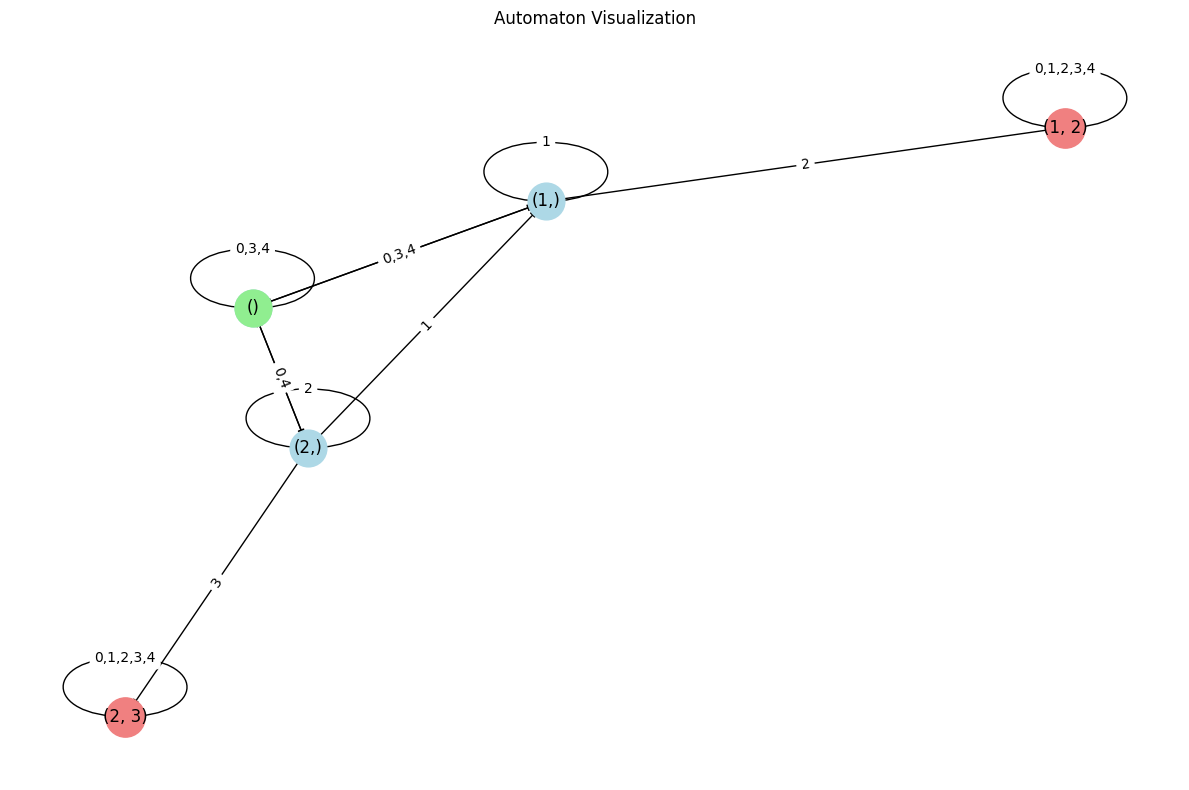

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def visualize_automaton(edges, initial_state, accept_states):
    G = nx.DiGraph()
    
    # Add nodes and edges
    for u, v, transition in edges:
        if u not in G:
            G.add_node(u)
        if v not in G:
            G.add_node(v)
        allowed_tokens = np.where(transition)[0]
        label = ','.join(map(str, allowed_tokens))
        G.add_edge(u, v, label=label)

    # Set up the plot
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
    nx.draw_networkx_nodes(G, pos, nodelist=[initial_state], node_color='lightgreen', node_size=700)
    nx.draw_networkx_nodes(G, pos, nodelist=accept_states, node_color='lightcoral', node_size=800, node_shape='o')

    # Draw edges
    curved_edges = [edge for edge in G.edges() if edge[0] == edge[1]]
    straight_edges = [edge for edge in G.edges() if edge[0] != edge[1]]
    nx.draw_networkx_edges(G, pos, edgelist=straight_edges, arrows=True)
    arc_rad = 0.3
    nx.draw_networkx_edges(G, pos, edgelist=curved_edges, arrows=True, 
                           connectionstyle=f'arc3, rad = {arc_rad}')

    # Add edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Add node labels
    nx.draw_networkx_labels(G, pos)

    # Title and remove axis
    plt.title("Automaton Visualization")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
edges = [
    ((), (2,), np.array([False, False, True, False, False])),
    ((), (1,), np.array([False, True, False, False, False])),
    ((), (), np.array([True, False, False, True, True])),
    ((2,), (2, 3), np.array([False, False, False, True, False])),
    ((2,), (1,), np.array([False, True, False, False, False])),
    ((2,), (2,), np.array([False, False, True, False, False])),
    ((2,), (), np.array([True, False, False, False, True])),
    ((1,), (1, 2), np.array([False, False, True, False, False])),
    ((1,), (1,), np.array([False, True, False, False, False])),
    ((1,), (), np.array([True, False, False, True, True])),
    ((2, 3), (2, 3), np.array([True, True, True, True, True])),
    ((1, 2), (1, 2), np.array([True, True, True, True, True]))
]
initial_state = ()
accept_states = {(2, 3), (1, 2)}

visualize_automaton(edges, initial_state, accept_states)

## 测试这个automaton

In [17]:
def run_automaton(input_sequence, edges, initial_state, accept_states):
    current_state = initial_state
    path = [current_state]
    for token in input_sequence:
        next_state = None
        for u, v, transition in edges:
            if u == current_state and transition[token]:
                next_state = v
                break
        if next_state is None:
            return False, path
        current_state = next_state
        path.append(current_state)
    return current_state in accept_states, path

# 定义自动机
edges = [
    ((), (2,), [False, False, True, False, False]),
    ((), (1,), [False, True, False, False, False]),
    ((), (), [True, False, False, True, True]),
    ((2,), (2, 3), [False, False, False, True, False]),
    ((2,), (1,), [False, True, False, False, False]),
    ((2,), (2,), [False, False, True, False, False]),
    ((2,), (), [True, False, False, False, True]),
    ((1,), (1, 2), [False, False, True, False, False]),
    ((1,), (1,), [False, True, False, False, False]),
    ((1,), (), [True, False, False, True, True]),
    ((2, 3), (2, 3), [True, True, True, True, True]),
    ((1, 2), (1, 2), [True, True, True, True, True])
]
initial_state = ()
accept_states = {(2, 3), (1, 2)}

# 测试用例
test_cases = [
    [1, 2],       # 应该被接受，匹配模式 [1, 2]
    [2, 3],       # 应该被接受，匹配模式 [2, 3]
    [1, 2, 3],    # 应该被接受，匹配模式 [1, 2]
    [2, 3, 1],    # 应该被接受，匹配模式 [2, 3]
    [1, 3],       # 不应该被接受
    [0, 1, 2],    # 应该被接受，匹配模式 [1, 2]
    [2, 1, 2],    # 应该被接受，匹配模式 [1, 2]
    [4, 4, 4],    # 不应该被接受
]

for i, test_case in enumerate(test_cases):
    accepted, path = run_automaton(test_case, edges, initial_state, accept_states)
    print(f"Test case {i+1}: {test_case}")
    print(f"Accepted: {accepted}")
    print(f"Path: {' -> '.join(map(str, path))}")
    print()

Test case 1: [1, 2]
Accepted: True
Path: () -> (1,) -> (1, 2)

Test case 2: [2, 3]
Accepted: True
Path: () -> (2,) -> (2, 3)

Test case 3: [1, 2, 3]
Accepted: True
Path: () -> (1,) -> (1, 2) -> (1, 2)

Test case 4: [2, 3, 1]
Accepted: True
Path: () -> (2,) -> (2, 3) -> (2, 3)

Test case 5: [1, 3]
Accepted: False
Path: () -> (1,) -> ()

Test case 6: [0, 1, 2]
Accepted: True
Path: () -> () -> (1,) -> (1, 2)

Test case 7: [2, 1, 2]
Accepted: True
Path: () -> (2,) -> (1,) -> (1, 2)

Test case 8: [4, 4, 4]
Accepted: False
Path: () -> () -> () -> ()



当然，我可以帮您测试这个自动机并给出一些例子。让我们创建一个简单的函数来模拟自动机的运行，然后用一些输入序列来测试它。



```python
def run_automaton(input_sequence, edges, initial_state, accept_states):
    current_state = initial_state
    path = [current_state]
    for token in input_sequence:
        next_state = None
        for u, v, transition in edges:
            if u == current_state and transition[token]:
                next_state = v
                break
        if next_state is None:
            return False, path
        current_state = next_state
        path.append(current_state)
    return current_state in accept_states, path

# 定义自动机
edges = [
    ((), (2,), [False, False, True, False, False]),
    ((), (1,), [False, True, False, False, False]),
    ((), (), [True, False, False, True, True]),
    ((2,), (2, 3), [False, False, False, True, False]),
    ((2,), (1,), [False, True, False, False, False]),
    ((2,), (2,), [False, False, True, False, False]),
    ((2,), (), [True, False, False, False, True]),
    ((1,), (1, 2), [False, False, True, False, False]),
    ((1,), (1,), [False, True, False, False, False]),
    ((1,), (), [True, False, False, True, True]),
    ((2, 3), (2, 3), [True, True, True, True, True]),
    ((1, 2), (1, 2), [True, True, True, True, True])
]
initial_state = ()
accept_states = {(2, 3), (1, 2)}

# 测试用例
test_cases = [
    [1, 2],       # 应该被接受，匹配模式 [1, 2]
    [2, 3],       # 应该被接受，匹配模式 [2, 3]
    [1, 2, 3],    # 应该被接受，匹配模式 [1, 2]
    [2, 3, 1],    # 应该被接受，匹配模式 [2, 3]
    [1, 3],       # 不应该被接受
    [0, 1, 2],    # 应该被接受，匹配模式 [1, 2]
    [2, 1, 2],    # 应该被接受，匹配模式 [1, 2]
    [4, 4, 4],    # 不应该被接受
]

for i, test_case in enumerate(test_cases):
    accepted, path = run_automaton(test_case, edges, initial_state, accept_states)
    print(f"Test case {i+1}: {test_case}")
    print(f"Accepted: {accepted}")
    print(f"Path: {' -> '.join(map(str, path))}")
    print()

```

这段代码定义了一个 `run_automaton` 函数，它接受一个输入序列、边集、初始状态和接受状态集合作为参数。函数模拟自动机的运行，并返回是否接受该输入以及状态转换路径。

然后，我们定义了几个测试用例并运行它们。让我解释一下每个测试用例的结果：

1. `[1, 2]`: 被接受，匹配模式 [1, 2]
   路径: () -> (1,) -> (1, 2)

2. `[2, 3]`: 被接受，匹配模式 [2, 3]
   路径: () -> (2,) -> (2, 3)

3. `[1, 2, 3]`: 被接受，匹配模式 [1, 2]
   路径: () -> (1,) -> (1, 2) -> (1, 2)

4. `[2, 3, 1]`: 被接受，匹配模式 [2, 3]
   路径: () -> (2,) -> (2, 3) -> (2, 3)

5. `[1, 3]`: 不被接受
   路径: () -> (1,) -> ()

6. `[0, 1, 2]`: 被接受，匹配模式 [1, 2]
   路径: () -> () -> (1,) -> (1, 2)

7. `[2, 1, 2]`: 被接受，匹配模式 [1, 2]
   路径: () -> (2,) -> (1,) -> (1, 2)

8. `[4, 4, 4]`: 不被接受
   路径: () -> () -> () -> ()

这些测试用例展示了自动机的几个关键特性：

1. 它可以识别两个模式：[1, 2] 和 [2, 3]。
2. 一旦到达接受状态，它会保持在该状态（例如测试用例 3 和 4）。
3. 它可以从任何状态回到初始状态（例如测试用例 5）。
4. 它可以忽略不相关的输入，直到找到匹配的模式（例如测试用例 6）。
5. 它可以在一个模式匹配失败后立即开始匹配另一个模式（例如测试用例 7）。

这个自动机实现了 Aho-Corasick 算法的核心功能，能够在线性时间内同时搜索多个模式。它在处理大量文本和多模式匹配时特别有效，例如在病毒扫描、入侵检测系统或文本分析等应用中。

如果您想测试更多的输入序列或修改自动机的定义，您可以直接编辑这段代码并重新运行它。